In [6]:
import numpy as np 
from scipy import stats
import pymc3 as pm
import arviz as az
import theano
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
az.style.use("arviz-darkgrid")
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Lets simulate data

In [7]:
#np draw from distribution
x = np.random.normal(30, 5, 50)
y = x + np.random.normal(-0.1, 0.2, 50)


In [8]:
#subtract (group difference)
x_real = x-y
#Scale values
x_real = x_real/np.std(x_real)

In [9]:
with pm.Model() as Cauchy:
    #priors
    delta = pm.Cauchy("delta", 0, 1)
    sigma = pm.HalfCauchy("sigma", 1)
    mu = pm.Deterministic("mu", sigma*delta)
    #like
    y_pred = pm.Normal("y_pred", mu = mu, sd = sigma, observed = x_real)
    #sample
    trace_1 = pm.sample(2000, tune = 2000, target_accept = 0.9)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, delta]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 25 seconds.


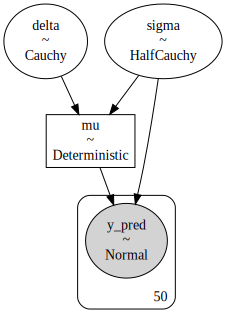

In [11]:
pm.model_to_graphviz(Cauchy)

In [12]:
az.summary(trace_1)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
delta  0.274  0.143  -0.019    0.514      0.002    0.001    6456.0  5910.0   
sigma  1.017  0.104   0.830    1.208      0.001    0.001    5832.0  5651.0   
mu     0.276  0.144   0.019    0.557      0.002    0.001    6590.0  5863.0   

       ess_bulk  ess_tail  r_hat  
delta    6442.0    5169.0    1.0  
sigma    6080.0    4736.0    1.0  
mu       6615.0    5393.0    1.0

In [13]:
az.plot_trace(trace_1)

array([[<AxesSubplot:title={'center':'delta'}>,
        <AxesSubplot:title={'center':'delta'}>],
       [<AxesSubplot:title={'center':'sigma'}>,
        <AxesSubplot:title={'center':'sigma'}>],
       [<AxesSubplot:title={'center':'mu'}>,
        <AxesSubplot:title={'center':'mu'}>]], dtype=object)

### 8.1.1
#### You could also use halfnormal or exponential priors and achieve reasonable results

In [14]:
with pm.Model() as Exponential:
    #priors
    delta = pm.Cauchy("delta", 0, 1)
    sigma = pm.Exponential("sigma", 1)
    mu = pm.Deterministic("mu", sigma*delta)
    #like
    y_pred = pm.Normal("y_pred", mu = mu, sd = sigma, observed = x_real)
    #sample
    trace_2 = pm.sample(2000, tune = 2000, target_accept = 0.9)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, delta]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 35 seconds.


In [15]:
az.summary(trace_2)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
delta  0.270  0.148  -0.008    0.544      0.002    0.001    6057.0  5135.0   
sigma  1.019  0.106   0.839    1.227      0.001    0.001    4984.0  4796.0   
mu     0.272  0.148  -0.010    0.543      0.002    0.001    6567.0  5793.0   

       ess_bulk  ess_tail  r_hat  
delta    6036.0    4403.0    1.0  
sigma    5265.0    3796.0    1.0  
mu       6605.0    4943.0    1.0

In [16]:
az.plot_trace(trace_2)

array([[<AxesSubplot:title={'center':'delta'}>,
        <AxesSubplot:title={'center':'delta'}>],
       [<AxesSubplot:title={'center':'sigma'}>,
        <AxesSubplot:title={'center':'sigma'}>],
       [<AxesSubplot:title={'center':'mu'}>,
        <AxesSubplot:title={'center':'mu'}>]], dtype=object)

array([<AxesSubplot:title={'center':'94.0% HDI'}>], dtype=object)

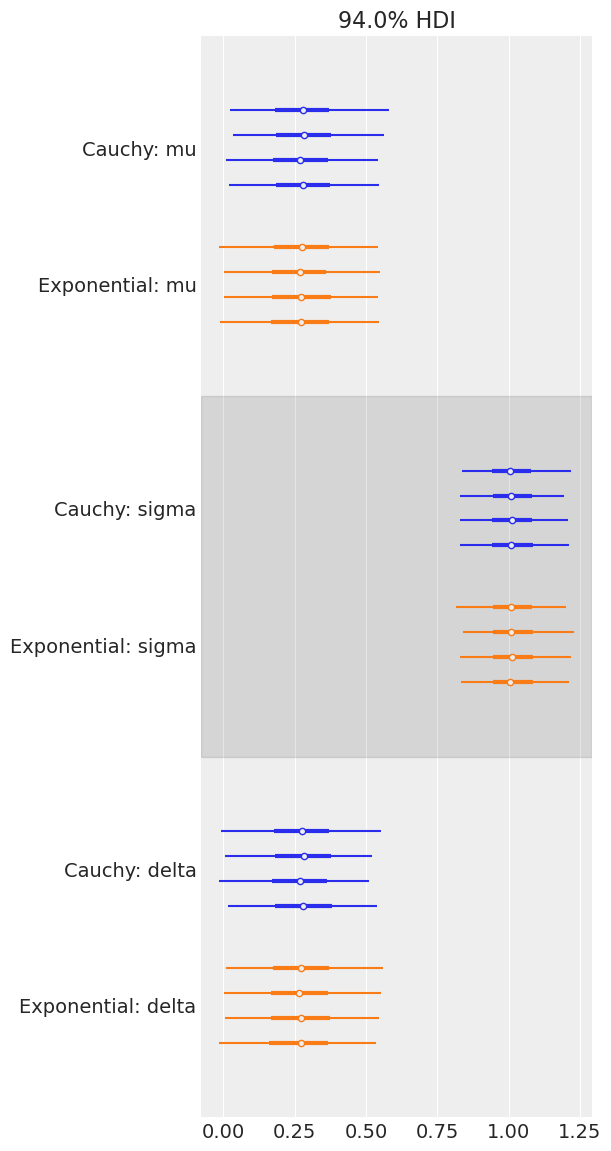

In [17]:
#This is a plot
az.plot_forest([trace_1, trace_2], model_names=["Cauchy","Exponential"], combined=False, colors='cycle', ridgeplot_kind="auto")

### 8.1.3


In [18]:
with pm.Model() as Gaussian:
    #priors
    delta = pm.Normal("delta", 0, 1)
    sigma = pm.Exponential("sigma", 1)
    mu = pm.Deterministic("mu", sigma*delta)
    #like
    y_pred = pm.Normal("y_pred", mu = mu, sd = sigma, observed = x_real)
    #sample
    trace_3 = pm.sample(2000, tune = 2000, target_accept = 0.9)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, delta]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 37 seconds.


In [19]:
az.summary(trace_3)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
delta  0.276  0.144   0.017    0.556      0.002    0.001    6540.0  5989.0   
sigma  1.014  0.102   0.833    1.207      0.001    0.001    6989.0  6909.0   
mu     0.277  0.145   0.006    0.549      0.002    0.001    6926.0  6491.0   

       ess_bulk  ess_tail  r_hat  
delta    6554.0    4975.0    1.0  
sigma    7035.0    5242.0    1.0  
mu       6965.0    5059.0    1.0

array([<AxesSubplot:title={'center':'94.0% HDI'}>], dtype=object)

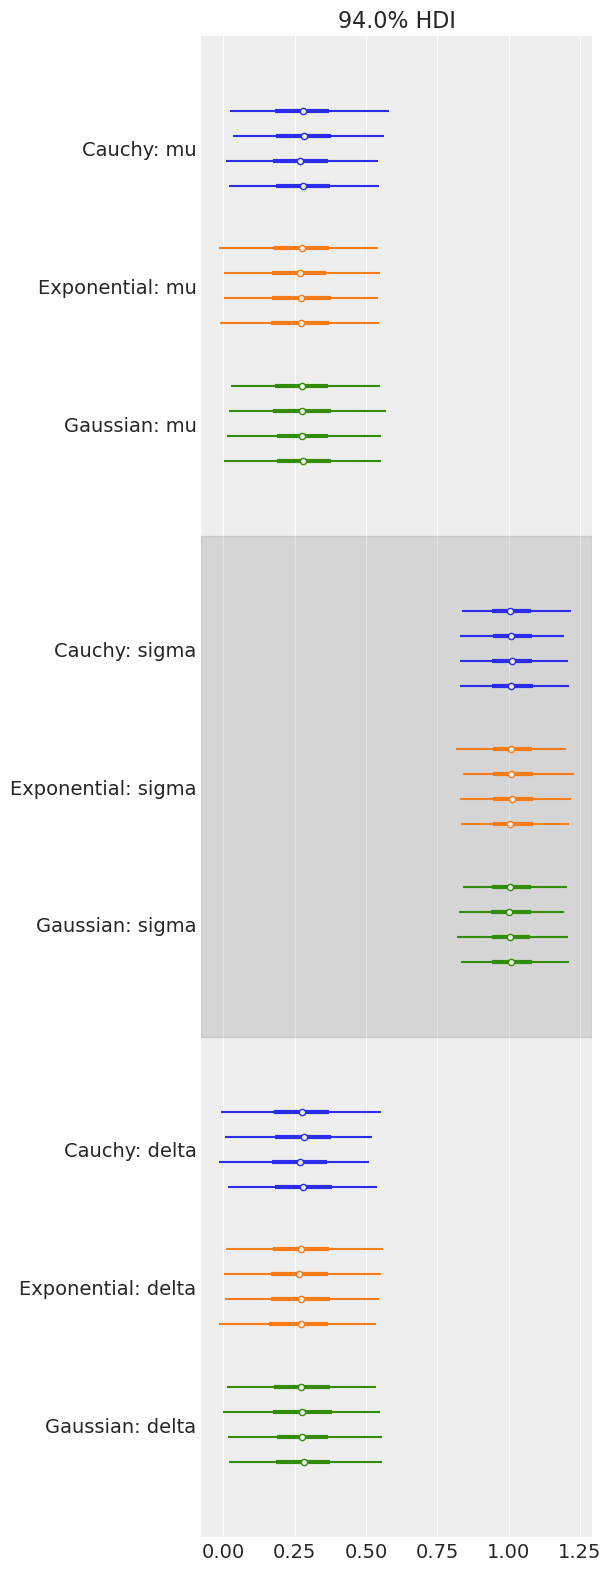

In [20]:
#This is a plot
az.plot_forest([trace_1, trace_2, trace_3], model_names=["Cauchy","Exponential", "Gaussian"], combined=False, colors='cycle', ridgeplot_kind="auto")

### This makes no difference on the results

## 8.2.1

In [21]:
with pm.Model() as Cauchy2:
    #priors
    delta = pm.HalfCauchy("delta", 1)
    delta_1 = pm.Deterministic("delta_1",(-1)*delta)
    sigma = pm.HalfCauchy("sigma", 1)
    mu = pm.Deterministic("mu", sigma*delta_1)
    #like
    y_pred = pm.Normal("y_pred", mu = mu, sd = sigma, observed = x_real)
    #sample
    trace_4 = pm.sample(2000, tune = 2000, target_accept = 0.9)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, delta]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 40 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


In [22]:
az.summary(trace_4)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
delta    0.054  0.048   0.000    0.142      0.001    0.000    4749.0  4749.0   
delta_1 -0.054  0.048  -0.142   -0.000      0.001    0.000    4749.0  4749.0   
sigma    1.065  0.114   0.859    1.280      0.002    0.001    3527.0  3452.0   
mu      -0.058  0.053  -0.157   -0.000      0.001    0.001    4622.0  4622.0   

         ess_bulk  ess_tail  r_hat  
delta      3027.0    2075.0    1.0  
delta_1    3027.0    2075.0    1.0  
sigma      3650.0    3520.0    1.0  
mu         2968.0    2075.0    1.0

In [23]:
az.summary(trace_1)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
delta  0.274  0.143  -0.019    0.514      0.002    0.001    6456.0  5910.0   
sigma  1.017  0.104   0.830    1.208      0.001    0.001    5832.0  5651.0   
mu     0.276  0.144   0.019    0.557      0.002    0.001    6590.0  5863.0   

       ess_bulk  ess_tail  r_hat  
delta    6442.0    5169.0    1.0  
sigma    6080.0    4736.0    1.0  
mu       6615.0    5393.0    1.0

In [24]:
az.plot_trace(trace_4)

array([[<AxesSubplot:title={'center':'delta'}>,
        <AxesSubplot:title={'center':'delta'}>],
       [<AxesSubplot:title={'center':'delta_1'}>,
        <AxesSubplot:title={'center':'delta_1'}>],
       [<AxesSubplot:title={'center':'sigma'}>,
        <AxesSubplot:title={'center':'sigma'}>],
       [<AxesSubplot:title={'center':'mu'}>,
        <AxesSubplot:title={'center':'mu'}>]], dtype=object)

In [25]:
az.plot_kde(x_real)

<AxesSubplot:>

In [26]:
with pm.Model() as Cauchy3:
    #priors
    delta = pm.HalfCauchy("delta", 1)
    sigma = pm.HalfCauchy("sigma", 1)
    mu = pm.Deterministic("mu", sigma*delta)
    #like
    y_pred = pm.Normal("y_pred", mu = mu, sd = sigma, observed = x_real)
    #sample
    trace_5 = pm.sample(2000, tune = 2000, target_accept = 0.9)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, delta]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 43 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.8335262237665384, but should be close to 0.9. Try to increase the number of tuning steps.


In [27]:
az.summary(trace_5)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
delta  0.288  0.130   0.043    0.520      0.002    0.002    3342.0  3342.0   
sigma  1.012  0.103   0.835    1.210      0.002    0.001    3468.0  3375.0   
mu     0.289  0.129   0.046    0.521      0.002    0.002    3502.0  3502.0   

       ess_bulk  ess_tail  r_hat  
delta    3079.0    2163.0    1.0  
sigma    3621.0    3748.0    1.0  
mu       3207.0    2104.0    1.0

## Lets give birth to a Bayes plot

In [38]:
test = az.summary(trace_5).iloc[0]
test

mean            0.288
sd              0.130
hdi_3%          0.043
hdi_97%         0.520
mcse_mean       0.002
mcse_sd         0.002
ess_mean     3342.000
ess_sd       3342.000
ess_bulk     3079.000
ess_tail     2163.000
r_hat           1.000
Name: delta, dtype: float64

In [ ]:


def pseudo_BD(trace, Cauchy_half = False):

    x_lin = np.linspace(-3, 3, 1000)
    #posterior:
    mu = az.summary(trace).iloc[0][0]
    sd = az.summary(trace).iloc[0][1]
    

   

